# MLE with exponential distribution

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

np.set_printoptions(precision=4, suppress=True)
sns.set_context('notebook')

%matplotlib inline

## Draw uniform density

$
f\left(y,\theta\right)=
\begin{cases}
0, & y\lt a,\\
\frac{1}{b-a}, & a\leq y\leq b,\\
0, & y\gt b.
\end{cases}
$

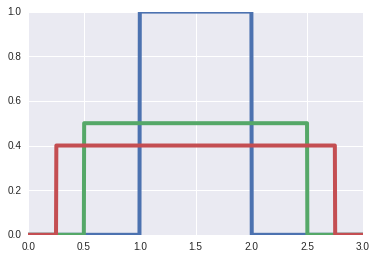

In [2]:
theta = [[1., 2], [.5, 2.5], [.25, 2.75]]

def f(x, a, b):
    if x < a or x > b:
        return 0
    else:
        return 1/(b-a)

y = np.linspace(0, 3, 1e3)
for t in theta:
    a, b = t[0], t[1]
    ff = [f(x, a, b) for x in y]
    plt.plot(y, ff, lw = 4)

plt.show()

## Simulate data and draw histogram

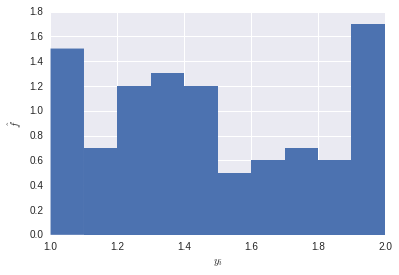

In [3]:
n = 100
a, b = 1., 2.
# simulate data
y = np.random.uniform(a, b, n)

# plot data
plt.hist(y, bins=10, normed=True, lw=0)
plt.xlabel('$y_i$')
plt.ylabel('$\hat{f}$')
plt.show()

## Simulate data and estimate model parameter by MLE

MLE estimator is

$$\hat{a}=\min\left(y_{i}\right),\quad\hat{b}=\max\left(y_{i}\right)$$

/home/khrapov/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Estimates are: a =  1.01133898829  b =  1.99754943931


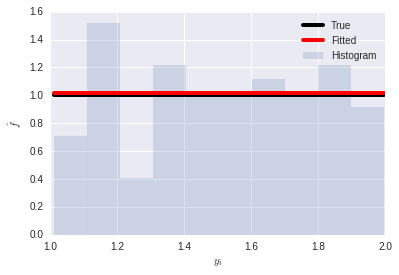

In [4]:
# sample size
n = 1e2
# true parameter value
a, b = 1., 2.
# simulate data
y = np.sort(np.random.uniform(a, b, n))
# MLE estimator
a_hat, b_hat = np.min(y), np.max(y)
print('Estimates are: a = ', a_hat, ' b = ', b_hat)
# function of exponential density
ff = lambda y, a, b: [f(x, a, b) for x in y]

# plot results
plt.hist(y, bins=10, normed=True, alpha=.2, lw=0)
plt.plot(y, ff(y, a, b), c='black', lw=4)
plt.plot(y, ff(y, a_hat, b_hat), c='red', lw=4)
plt.xlabel(r'$y_i$')
plt.ylabel(r'$\hat{f}$')
plt.legend(('True', 'Fitted','Histogram'))
plt.show()